In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split,cross_validate

import pandas as pd 
df = pd.read_excel('/content/Test_dataset.xlsx')

print(df)

           Date  index  Target  shift_down  ...  Quater  Quater_ver2  Month  Day
0    2014-01-08      6   525.0       525.0  ...       1            1      1    8
1    2014-01-09      7   525.0       525.0  ...       1            1      1    9
2    2014-01-10      8   525.0       525.0  ...       1            1      1   10
3    2014-01-13     11   525.0       525.0  ...       1            1      1   13
4    2014-01-14     12   525.0       525.0  ...       1            1      1   14
...         ...    ...     ...         ...  ...     ...          ...    ...  ...
2100 2022-01-26   2483   765.0       762.0  ...       1           33      1   26
2101 2022-01-27   2484   770.0       765.0  ...       1           33      1   27
2102 2022-01-28   2485   777.0       770.0  ...       1           33      1   28
2103 2022-01-31   2488   777.0       777.0  ...       1           33      1   31
2104 2022-02-01   2489   777.0       777.0  ...       1           33      2    1

[2105 rows x 51 columns]


In [ ]:
df.set_index('Date', inplace=True)
print(df)

Dataset = df[['MA5_f', 'Target', '1)철광석-중국', '4)철스크랩-터키수입가', '5)WTI', '5)BSI-해운지수', '2)중국-Flat재고', '3)중국-판재+롱재고', '4)중국-석탄내수', 'Quater', 
             '1)열연-미국', '1)열연-뭄바이', '1)열연-북유럽', '1)열연-한국', '1)GI-상해', '1)GI-미국']]

Dataset = Dataset.dropna(axis=0)  # 데이터 없는거 지우기 (앞부분)

In [ ]:
print(Dataset) 
Dataset.info()

            MA5_f  Target    1)철광석-중국  ...     1)열연-한국     1)GI-상해      1)GI-미국
Date                                   ...                                     
2019-12-30  484.2   483.0   95.743000  ...  602.824664  664.485000   836.654285
2019-12-31  485.2   483.0   95.944000  ...  602.824664  665.880000   836.654285
2020-01-01  486.2   483.0   95.944000  ...  602.824664  665.880000   837.756596
2020-01-02  487.2   485.0   96.803200  ...  602.824664  665.880000   837.756596
2020-01-03  488.2   485.0   97.648000  ...  605.065261  667.740000   837.756596
...           ...     ...         ...  ...         ...         ...          ...
2022-01-26  775.6   765.0  140.800506  ...  940.860215  890.681854  1897.077766
2022-01-27  777.0   770.0  140.473823  ...  940.860215  888.615307  1897.077766
2022-01-28  777.6   777.0  147.810362  ...  931.470393  885.289724  1897.077766
2022-01-31  780.2   777.0  147.024137  ...  931.470393  885.289724  1897.077766
2022-02-01  783.2   777.0  147.024137  .

In [ ]:
# df.info()
# split_time = 420

Y_colname = ['MA5_f']
# X_remove = ['datetime', 'DateTime', 'temp_group', 'casual', 'registered']
# X_colname = [x for x in raw_fe.columns if x not in Y_colname+X_remove]
X_colname = ['Target', '1)철광석-중국', '4)철스크랩-터키수입가', '5)WTI', '5)BSI-해운지수', '2)중국-Flat재고', '3)중국-판재+롱재고', '4)중국-석탄내수', 'Quater', 
             '1)열연-미국', '1)열연-뭄바이', '1)열연-북유럽', '1)열연-한국', '1)GI-상해', '1)GI-미국']


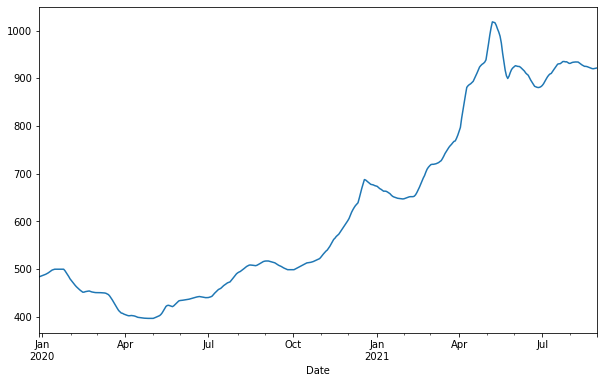

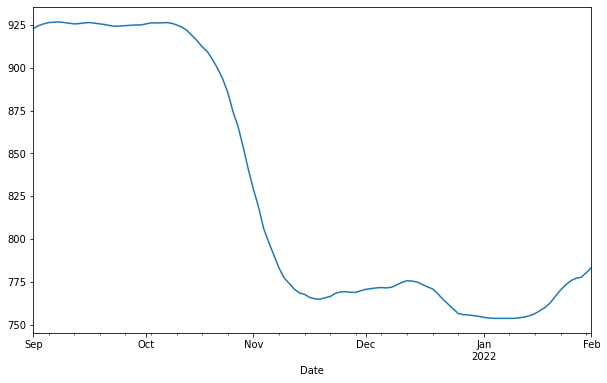

In [ ]:
split_time = 437  # 547의 80% 수준

# 1) 평균가격 만으로 예측한 것 - MA5_f
x_train = Dataset.MA5_f[:split_time]
x_valid = Dataset.MA5_f[split_time:]
plt.figure(figsize=(10, 6))
x_train.plot()


x_today = Dataset.Target[split_time:]   #당일 가격

plt.figure(figsize=(10, 6))
x_valid.plot()
plt.show()

Date
2021-09-01    922.8
2021-09-02    924.6
2021-09-03    925.6
2021-09-06    926.4
2021-09-07    926.6
              ...  
2022-01-26    775.6
2022-01-27    777.0
2022-01-28    777.6
2022-01-31    780.2
2022-02-01    783.2
Name: MA5_f, Length: 110, dtype: float64
Date
2021-09-01      NaN
2021-09-02    922.8
2021-09-03    924.6
2021-09-06    925.6
2021-09-07    926.4
              ...  
2022-01-26    773.2
2022-01-27    775.6
2022-01-28    777.0
2022-01-31    777.6
2022-02-01    780.2
Name: MA5_f, Length: 110, dtype: float64


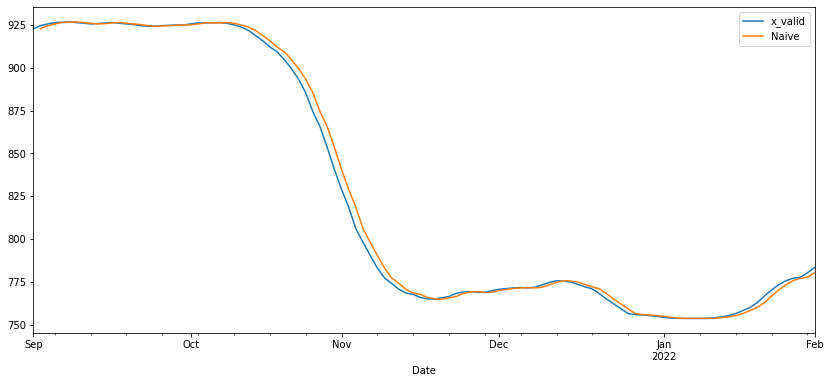

In [ ]:
# Naive Forecasting - 1차버전 : "이번주 평균가격 = 다음주 평균가격" 가정시
#naive_forecast = df.MA5_f[split_time - 1:-1]
naive_forecast = x_valid.shift(1)

plt.figure(figsize=(14, 6))
#naive_forecast.plot()


print(x_valid)
print(naive_forecast)

x_valid.plot(label='x_valid')
#plt.show()
naive_forecast.plot(label='Naive')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    

MAE = mean_absolute_error(x_valid[1:], naive_forecast[1:])
MSE = mean_squared_error(x_valid[1:], naive_forecast[1:])
MAPE = MAPE(x_valid[1:], naive_forecast[1:])

print("Naive Forecasting - 1차버전 : 이번주 평균가격 = 다음주 평균가격 가정시\n")
pd.options.display.float_format = '{:,.2f}'.format
display(pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T)



,MAE,MSE,MAPE
Score,2.16,13.72,0.26


Date
2021-09-01   922.80
2021-09-02   924.60
2021-09-03   925.60
2021-09-06   926.40
2021-09-07   926.60
              ...  
2022-01-26   775.60
2022-01-27   777.00
2022-01-28   777.60
2022-01-31   780.20
2022-02-01   783.20
Name: MA5_f, Length: 110, dtype: float64
Date
2021-09-01   919.00
2021-09-02   919.00
2021-09-03   923.00
2021-09-06   924.00
2021-09-07   924.00
              ...  
2022-01-26   765.00
2022-01-27   770.00
2022-01-28   777.00
2022-01-31   777.00
2022-02-01   777.00
Name: Target, Length: 110, dtype: float64


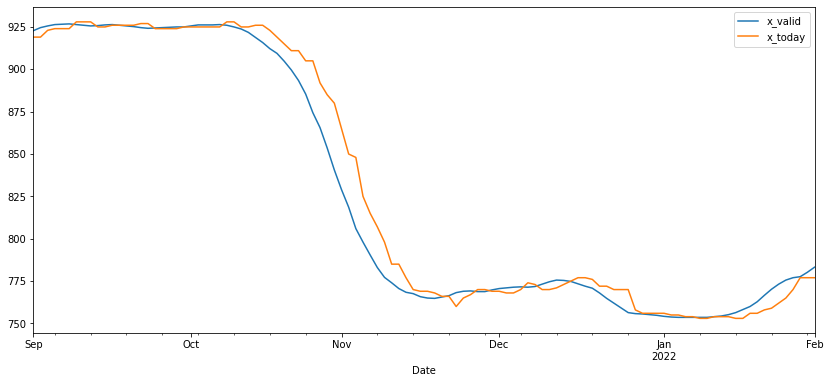

,MAE,MSE,MAPE
Score,6.58,125.16,0.80


In [ ]:
# Naive Forecasting 2차 버전 : 현재가격 = 1주일 후 평균가격 가정

plt.figure(figsize=(14, 6))
#naive_forecast.plot()


print(x_valid)
print(x_today)

x_valid.plot(label='x_valid')
#plt.show()
x_today.plot(label='x_today')

#plot_series(x_valid.index, x_valid)
#plot_series(naive_forecast.index, naive_forecast)
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    

MAE = mean_absolute_error(x_valid, x_today)
MSE = mean_squared_error(x_valid, x_today)
MAPE = MAPE(x_valid, x_today)

print("Naive Forecasting - 1차버전 : 현재가격 = 1주일 후 평균가격 가정시\n")
pd.options.display.float_format = '{:,.2f}'.format
display(pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T)
